<h1>TRABAJO MUESTREO - INFERENCIA</h1>

En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años:

 https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData

Considere estos datos como una población finita. Las variables que componen la tabla son:



 - `periodo:` año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función revalue y describa, brevemente, su funcionamiento.
 -  `apli_consecutivo:` consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante
 -  `estu_depto_reside:` departamento de residencia del estudiante
 -   `estu_cod_reside_depto:` código DANE del departamento de residencia del estudiante
 -   `inst_cod_institucion:` código de la IES ante el ministerio. Único por Institución
 -   `inst_nombre_institucion:` Nombre de la Institución. Algunas presentan sedes y subsedes
 -   `raz_cuant_punt:` Puntaje Razonamiento Cuantitativo
 -   `raz_cuant_des:` Nivel de Desempeño Razonamiento Cuantitativo (categórica)
 -   `lect_crit_punt:` Puntaje Lectura Crítica
 -   `lect_crit_des:` Nivel de Desempeño Lectura Crítica (categórica)
 -   `comp_ciud_punt:` Puntaje Competencias Ciudadanas
 -   `comp_ciud_des:` Nivel de Desempeño Competencias Ciudadanas (categórica)
 -   `ingles_punt:` Puntaje Inglés
 -   `ingles_desem:` Nivel de Desempeño en Inglés (categórica)
 -  `comu_escr_punt:` Puntaje Comunicación Escrita
 -  `comu_escr_des:` Nivel de Desempeño Comunicación Escrita (categórica)

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:


   1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
   2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
   3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
   4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
    Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
   5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

Recomendaciones:

 -   Procure tabular de manera adecuada las estimaciones para optimizar espacio
 -   Evite extenderse en las explicaciones
 -   Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
 -   Referencie las fórmulas empleadas en los cálculos


**Asignatura: Estadistica 2**

**Profesor: Carlos Alfonso Mantilla Duarte**

**Grupo: F1**



<table style="font-size:14px;">
<thead>
<td style="text-align:center" ><strong>Integrante</strong></td>
<td style="text-align:center"><strong>Codigo</strong></td>
</thead>
<tr>
<td style="text-align:center">Orlando Alberto Moncada Rodriguez</td>
<td style="text-align:center">2170133</td>
</tr>
    <tr>
<td style="text-align:center">Santiago Andres Castro Duitama</td>
<td style="text-align:center">2170134</td>
</tr>
    <tr>
<td style="text-align:center">David Santiago Morales Norato</td>
<td style="text-align:center">2170102</td>
</tr>
</table>

# Desarrollo

In [15]:
saberpro<-get(load("saberpro.RData"))
head(saberpro) #Cargamos los datos en una variable llamada "saberpro" e imprimimos los 6 primeros datos.

periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
20163,EK201630062726,ATLANTICO,8,1202,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,160,3,130,2,167,3,160,A2,155,3
20163,EK201630208121,CUNDINAMARCA,25,2725,POLITECNICO GRANCOLOMBIANO-BOGOTÃ D.C.,138,2,132,2,77,1,125,A1,164,3
20163,EK201630220210,CALDAS,17,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÃ D.C.,146,2,157,2,150,2,104,A1-,122,2
20163,EK201630180243,MAGDALENA,47,10413,IED ESCUELA NORMAL SUPERIOR MARÃA AUXILIADORA - SEDE PRINCIPAL-SANTA MARTA,160,3,172,3,151,2,160,A2,192,4
20163,EK201630225077,CORDOBA,23,1113,UNIVERSIDAD DE CORDOBA-MONTERIA,130,2,122,1,144,2,192,B1,131,2
20163,EK201630189735,CAUCA,19,1807,UNIVERSIDAD LIBRE-CALI,159,3,129,2,147,2,108,A1-,154,3


In [8]:
dim(saberpro) #Cantidad de columnas y filas del dataframe

[1] 725295     16

1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables

In [10]:
puntajeing<-data.frame(codigo=saberpro$estu_cod_reside_depto, puntajeing=saberpro$ingles_punt, dpto=saberpro$estu_depto_reside)

In [11]:
n1<-1000
muestra1<- sample(1:nrow(puntajeing),size=n1,replace=FALSE)
head(muestra1)

[1] 199204 193938 110911 614742 394088 308686

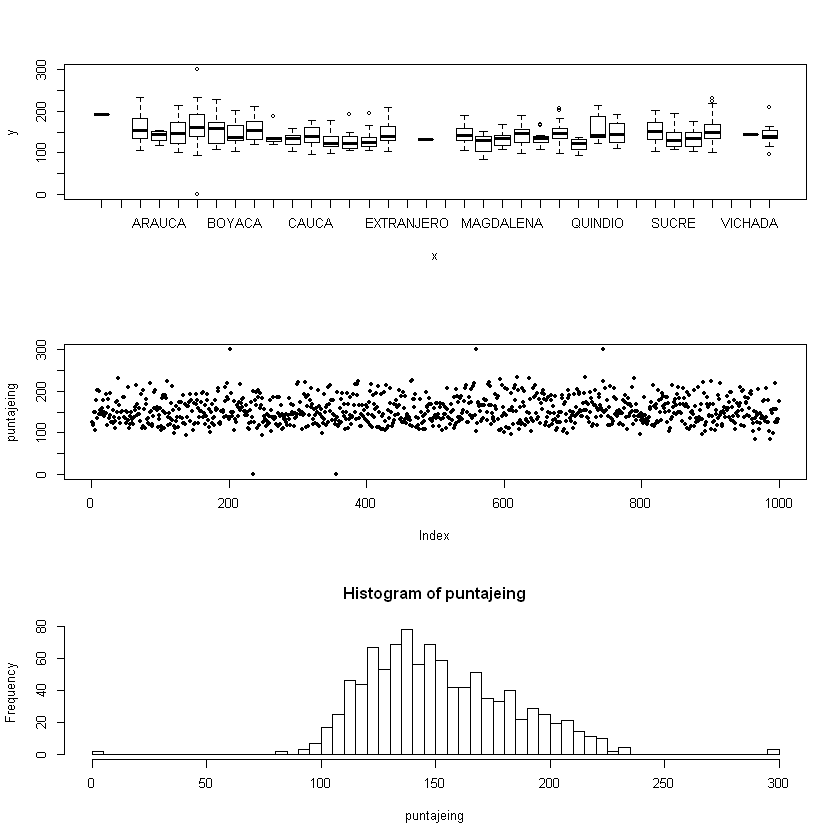

In [21]:
par(mfrow=c(3,1))
with(puntajeing[muestra1,], plot(dpto,puntajeing))
with(puntajeing[muestra1,], plot(puntajeing, pch = 20))
with(puntajeing[muestra1,], hist(puntajeing, nclass = 50))
par(mfrow=c(1,1))

2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes

3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes

4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta

5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.